In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.utils import resample
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix

In [2]:
df=pd.read_csv('archive/creditcard.csv')

In [3]:
legit = df[df.Class == 0]
fraud =df[df.Class == 1]

In [4]:
legit_sample = legit.sample(n=20000)

In [5]:
df_fraud_oversampled = resample(fraud, 
                                 replace=True,   
                                 n_samples=5000 , 
                                 random_state=0)  

df_oversampled = pd.concat([df_fraud_oversampled, legit_sample])

In [6]:
df_oversampled.Class.value_counts()

0    20000
1     5000
Name: Class, dtype: int64

In [7]:
X = df_oversampled.drop(columns='Class', axis=1)
Y = df_oversampled['Class']

In [8]:
counts = df_oversampled.Class.value_counts()

Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

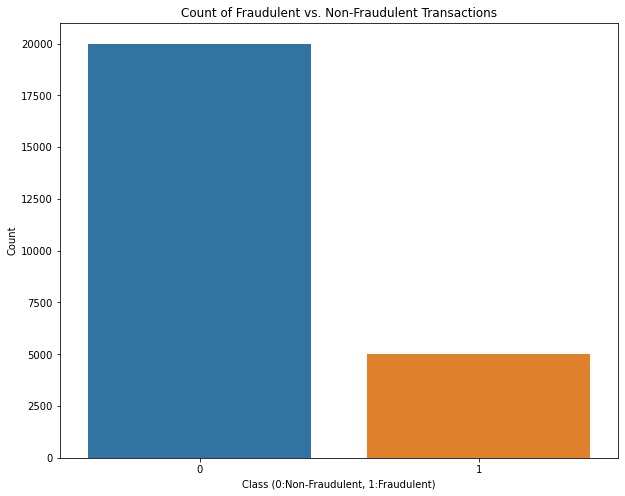

In [9]:
plt.figure(figsize=(10,8))
sns.barplot(x=counts.index, y=counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [11]:
model = LogisticRegression()

In [12]:
model.fit(X_train, Y_train)

LogisticRegression()

In [13]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [14]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.96845


In [15]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [16]:
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.9638


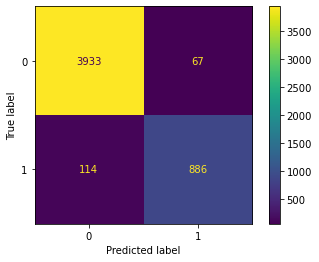

In [17]:
plot_confusion_matrix(model,X_test,Y_test)